In [3]:
# dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import nltk
from wordcloud import WordCloud

In [46]:
import pandas as pd

summaries = pd.read_csv('summaries_train.csv')
prompts = pd.read_csv("prompts_train.csv")
summaries.head(2)

,student_id,prompt_id,text,content,wording
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538
1,0020ae56ffbf,ebad26,They would rub it up with soda to make the sme...,-0.548304,0.506755


In [5]:
prompts

,prompt_id,prompt_question,prompt_title,prompt_text
0,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...
1,3b9047,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...
2,814d6b,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
3,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an..."


In [6]:
summaries.describe()

,content,wording
count,7165.000000,7165.000000
mean,-0.014853,-0.063072
std,1.043569,1.036048
min,-1.729859,-1.962614
25%,-0.799545,-0.872720
50%,-0.093814,-0.081769
75%,0.499660,0.503833
max,3.900326,4.310693


Text(0.5, 1.0, 'Distribution of wording')

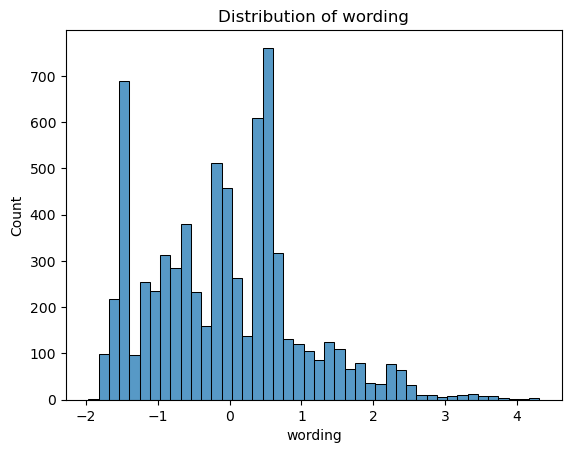

In [7]:
sns.histplot(summaries['wording'])
plt.title("Distribution of wording")

Text(0.5, 1.0, 'Distribution of content')

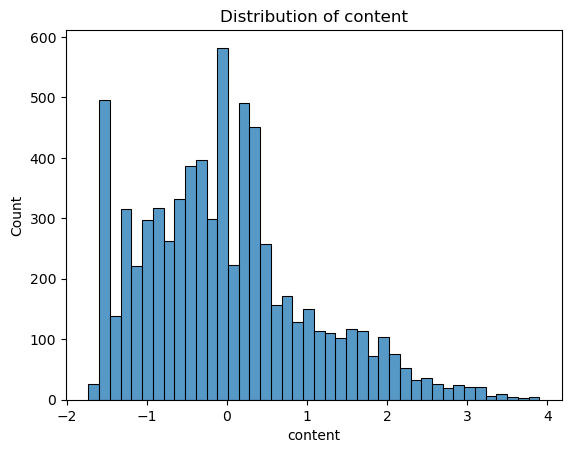

In [8]:
sns.histplot(summaries['content'])
plt.title("Distribution of content")

/Users/jadonng/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='content', ylabel='wording'>

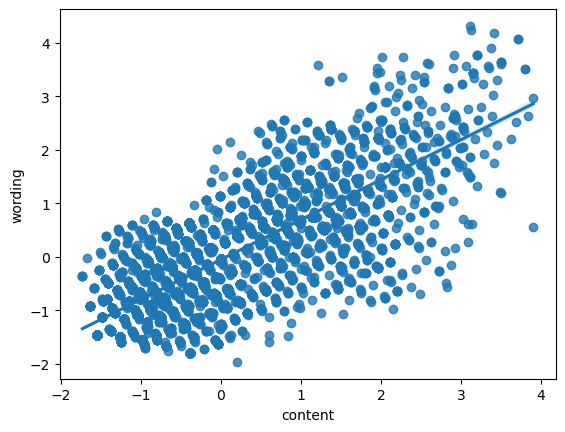

In [9]:
sns.regplot(summaries['content'], summaries['wording'])

# Case study with prompt 39c16e 

In [12]:
prompts.head()

,prompt_id,prompt_question,prompt_title,prompt_text
0,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...
1,3b9047,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...
2,814d6b,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
3,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an..."


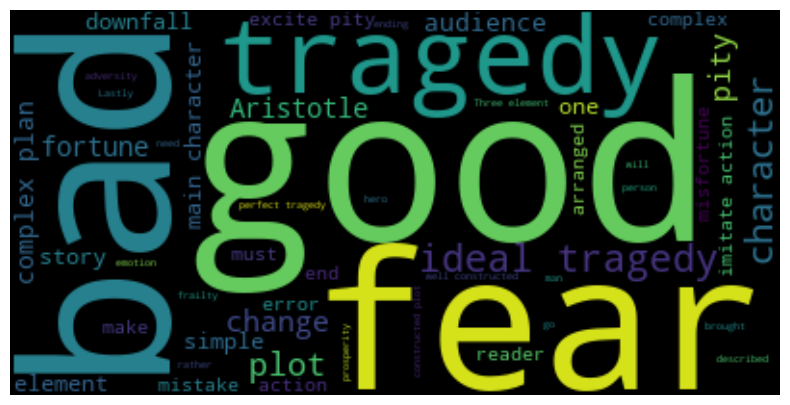

In [20]:
# Generate word cloud
wc = WordCloud(
    max_words=50, 
)

wordcloud = wc.generate(text_1)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [11]:
print(prompts.query("prompt_id == '39c16e'").prompt_question[0])

print('\n')

print(prompts.query("prompt_id == '39c16e'").prompt_text[0])

Summarize at least 3 elements of an ideal tragedy, as described by Aristotle.


Chapter 13 
As the sequel to what has already been said, we must proceed to consider what the poet should aim at, and what he should avoid, in constructing his plots; and by what means the specific effect of Tragedy will be produced. 
A perfect tragedy should, as we have seen, be arranged not on the simple but on the complex plan. It should, moreover, imitate actions which excite pity and fear, this being the distinctive mark of tragic imitation. It follows plainly, in the first place, that the change of fortune presented must not be the spectacle of a virtuous man brought from prosperity to adversity: for this moves neither pity nor fear; it merely shocks us. Nor, again, that of a bad man passing from adversity to prosperity: for nothing can be more alien to the spirit of Tragedy; it possesses no single tragic quality; it neither satisfies the moral sense nor calls forth pity or fear. Nor, again, should th

### Lowest content score vs Highest content score

In [13]:
summaries.query("prompt_id == '39c16e'").sort_values(by='content').text.values[0]

'A tragedy can both be a good and bad thing, it can lead to the downfall of a hero or be somewhat comicle. Shows great error or frailty in a character'

In [14]:
summaries.query("prompt_id == '39c16e'").sort_values(by='content').text.values[-1]

'As described by Aristotle, three elements of an ideal tragedy would be that the plot should feature the downfall of a man who is not completely evil but who has a flaw which causes his downfall, that it should cause fear and pity in the audience, and that it should have a complex plot, but not a plot with two thread that has two different catastrophes for the good and the bad.  Aristotle  believes that the goal of a tragedy is to "imitate actions which excite pity and fear" and argues that in order for the tragedy to accomplish this goal, it should feature the downfall of a hero "who is neiter eminently good and just, yet whose misfortune is brought on not by vice or depravity, but by some error of judgement or frailty." He thinks that if the hero were purely good, his downfall would simply be shocking to the audience, whereas the downfall of a purely evil man would not arouse pity or fear, since "pity is aroused by unmerited misfortune, fear by the misfortune of a man like ourselves"

### Lowest wording score vs Highest wording score

In [15]:
summaries.query("prompt_id == '39c16e'").sort_values(by='wording').text.values[0]

'The ideal tragedy should imitate actions that excite pity and fear. Pity is aroused by unmerited misfortune, fear by the misfortune of a man like ourselves. A well-constructed plot should, therefore, be single in its issue, rather than double as some maintain. It should come about as the result, not of vice, but of some great error or frailty, in a character either such as we have described, or better rather than worse. A tragedy, then, to be perfect according to the rules of art, should be of this construction. Hence they are in error who censure Euripides just because he follows this principle in his plays, many of which end unhappily. '

In [16]:
summaries.query("prompt_id == '39c16e'").sort_values(by='wording').text.values[-1]

'A true tragedy features many elements of misfortune and few of good luck. In this passage,  Aristotle outlines the faults in some so called "tragedies," and what caused others to succeed. The entire point of tragedy is to invoke a deep and true feeling of pity or sadness in the reader, something they can relate to on some level. a man going from rich to poor does not invoke these feelings, and neither does a man going from rags to riches. Villians falling and heroes rising cause opposite emotions than what is to be striven for in a tragedy, so a true tragedy has to have a merely ok character, usually with a moral compass that is skewed. As the focus on this one mediocre man, they shouldn\'t be taken on tangents that stray from the one main topic of the story of this man. A tragedy written to please the readers like The Odyssey, oftentimes more resembles the plot of a comedy than a tragedy. We have been able to infer from this article that a good tragedy follows at least 3 very importa

# Feature Engineering

In [78]:
import pandas as pd

summaries = pd.read_csv('summaries_train.csv')
prompts = pd.read_csv("prompts_train.csv")
summaries.head(2)

,student_id,prompt_id,text,content,wording
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538
1,0020ae56ffbf,ebad26,They would rub it up with soda to make the sme...,-0.548304,0.506755


## Text count (high correlation)

In [47]:
summaries['text_count'] = summaries['text'].apply(lambda x: len(x.split()))

In [45]:
summaries.shape

(7165, 6)

<AxesSubplot:xlabel='text_count', ylabel='Count'>

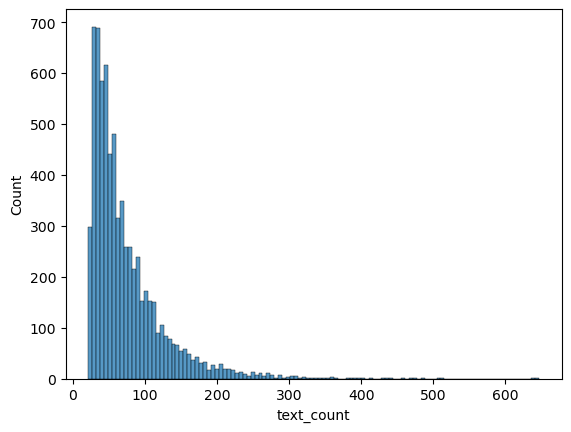

In [46]:
sns.histplot(summaries.text_count)

Text(0.5, 1.0, 'correlation between word count and wording score')

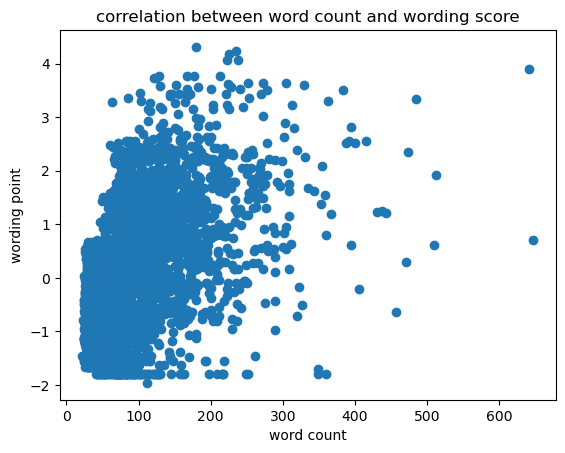

In [47]:
plt.scatter(summaries.text_count, summaries.wording)
plt.xlabel("word count")
plt.ylabel("wording point")
plt.title("correlation between word count and wording score")

Text(0.5, 1.0, 'correlation between word count and content score')

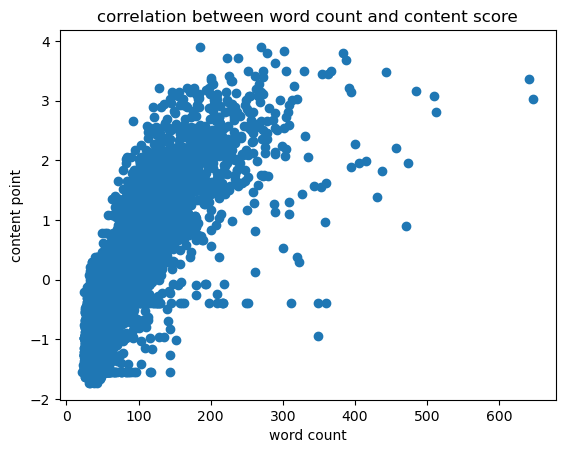

In [48]:
plt.scatter(summaries.text_count, summaries.content)
plt.xlabel("word count")
plt.ylabel("content point")
plt.title("correlation between word count and content score")

In [49]:
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


def stop_word_count(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)

    stop_word = 0
    for token in word_tokens:
        if token in stop_words:
            stop_word += 1
            
    return stop_word

summaries['stopword_count'] = summaries['text'].apply(stop_word_count)
summaries.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jadonng/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,student_id,prompt_id,text,content,wording,text_count,stopword_count
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,61,21
1,0020ae56ffbf,ebad26,They would rub it up with soda to make the sme...,-0.548304,0.506755,52,29
2,004e978e639e,3b9047,"In Egypt, there were many occupations and soci...",3.128928,4.231226,235,92
3,005ab0199905,3b9047,The highest class was Pharaohs these people we...,-0.210614,-0.471415,25,10
4,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,203,81


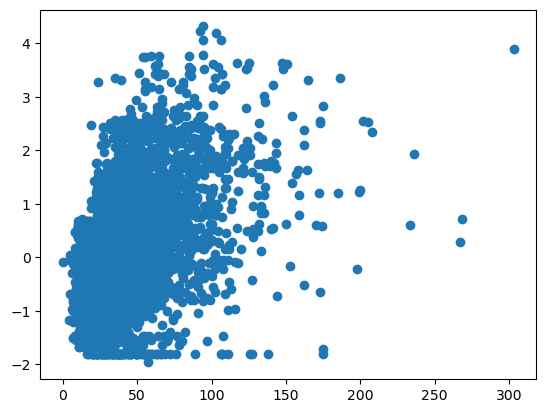

In [53]:
plt.scatter(data=summaries, x='stopword_count', y='wording')

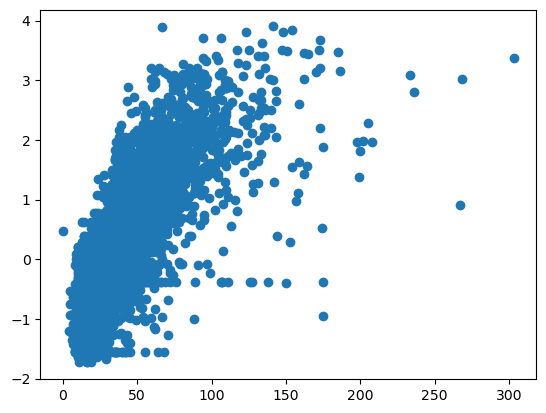

In [54]:
plt.scatter(data=summaries, x='stopword_count', y='content')

### Stopword_count have a high collinearity with the word count, not a good metrics, either use one of the feature

## Average length of each word (not much correlation)

In [48]:
summaries['average_token_length'] = summaries.text.apply(lambda x: len(remove_stopwords(x))/len(remove_stopwords(x).split()))

/Users/jadonng/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='average_token_length', ylabel='content'>

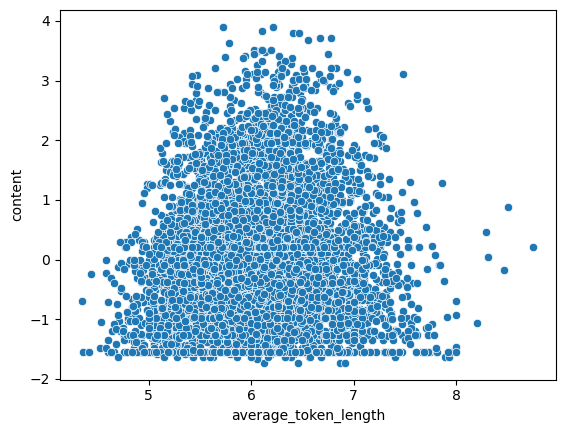

In [16]:
sns.scatterplot(summaries['average_token_length'],summaries['content'])

/Users/jadonng/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='average_token_length', ylabel='wording'>

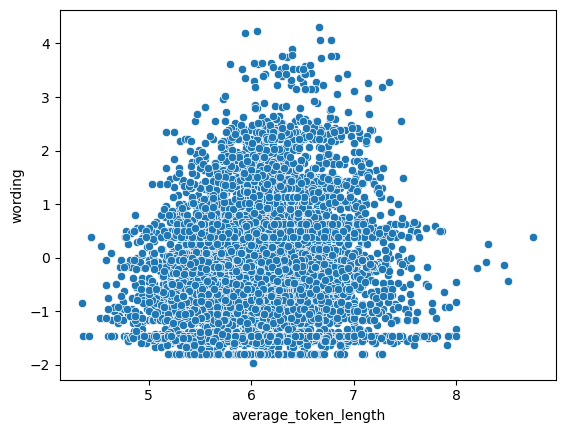

In [17]:
sns.scatterplot(summaries['average_token_length'],summaries['wording'])

## Punctuation Count

In [56]:
import string
def count_punctuation(text):
    count = 0
    for char in text:
        if char in string.punctuation:
            count += 1
    return count

summaries['punct_count'] = summaries.text.apply(count_punctuation)

/Users/jadonng/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='punct_count', ylabel='content'>

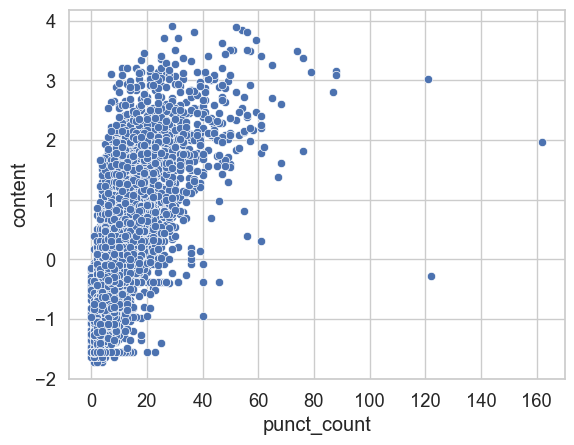

In [62]:
sns.scatterplot(summaries['punct_count'], summaries['content'])

## Relative Similarity 

Idea:
1. Split them into different groups each group represent a single prompt id
2. Combine all the words from the students (text feature) together and get the word count for top 50 most frequent text
3. Calculate a score for each student's text based on how many of the top 50 words appeared in the essay

### Functions

In [50]:
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


nltk.download('stopwords')
nltk.download('punkt')


def remove_punct(text):
    return re.sub(r'[^\w\s]', '', text)

def remove_stopwords(text):

    words = word_tokenize(text)

    # Get the English stop words
    stop_words = set(stopwords.words('english'))

    # Remove stop words
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Join the filtered words back into a sentence
    filtered_text = ' '.join(filtered_words)
    
    return filtered_text


def top50_overall_counter(text):
    # Split the sentence into words using the split() method
    words = text.split()

    # Create a Counter object from the list of words
    word_counts = Counter(words)

    top_50_words = word_counts.most_common(50)

    return top_50_words

def top20_overall_counter(text):
    words = text.split()
    word_counts = Counter(words)
    top_20_words = word_counts.most_common(20)
    return top_20_words

def word_frequency_counter(text):
    words = text.split()
    word_counts = Counter(words)
    return word_counts

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jadonng/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/jadonng/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Working Env

In [51]:
def wf_relativity(text, word_list, weight_list):
    total_score = 0
    word_count = word_frequency_counter(remove_stopwords(remove_punct(text)))
    for word, weight in word_count.items():
        if word in word_list:
            total_score += weight * weight_list[word_list.index(word)]/sum(weight_list)
    return total_score


# def wf_relativity1(text, word_list, weight_list):
#     total_score = 0
#     individual_top20 = top20_overall_counter(remove_stopwords(remove_punct(text)))
#     for word, weight in individual_top20:
#         if word in word_list:
#             total_score += weight * weight_list[word_list.index(word)]/weighted_total
#     return total_score

In [52]:
all_env = []

for prompt_id in prompts.prompt_id.unique():
    # get top 50 words and weight from current prompt
    cur_env = summaries[summaries['prompt_id']==prompt_id]
    combined_cleaned_text = remove_stopwords(remove_punct(' '.join(cur_env.text.values)))
    top50_prompt = top50_overall_counter(combined_cleaned_text)
    
    word_list = [word for word, _ in top50_prompt]
    weight_list = [weight for _, weight in top50_prompt]
    weighted_total = sum(weight_list)
    
    cur_env['wf_relativity'] = cur_env.text.apply(lambda x: wf_relativity(x, word_list, weight_list))
    
    all_env.append(cur_env)
    
summaries = pd.concat(all_env)

/var/folders/fm/rwn89n9x1b94vk3rbr72zvtw0000gn/T/ipykernel_43315/429660189.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cur_env['wf_relativity'] = cur_env.text.apply(lambda x: wf_relativity(x, word_list, weight_list))


In [53]:
summaries = summaries.reset_index().drop('index',axis=1)

### Evaluation and adjustments

In [140]:
summaries_test = summaries.copy()

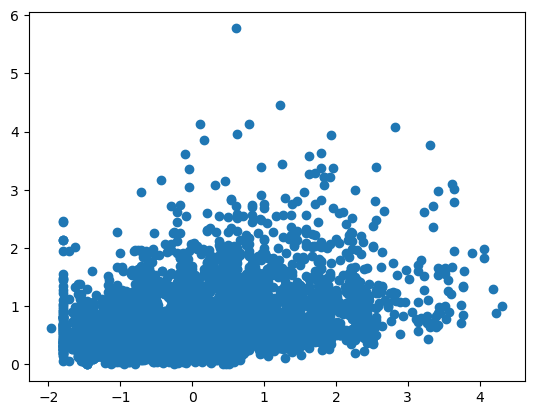

In [141]:
plt.scatter(data=summaries_test, x='wording',y='wf_relativity')

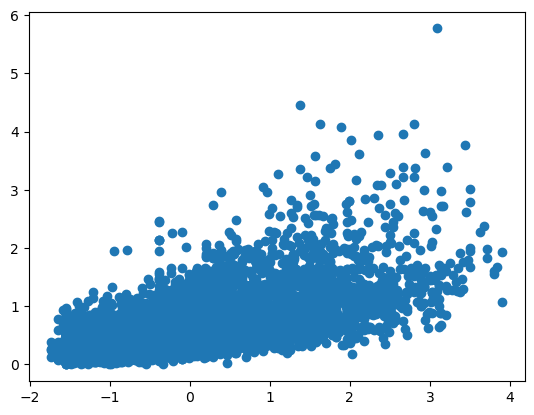

In [142]:
plt.scatter(data=summaries_test, x='content',y='wf_relativity')

Pretty positive result especially for content score

<AxesSubplot:xlabel='wf_relativity', ylabel='Count'>

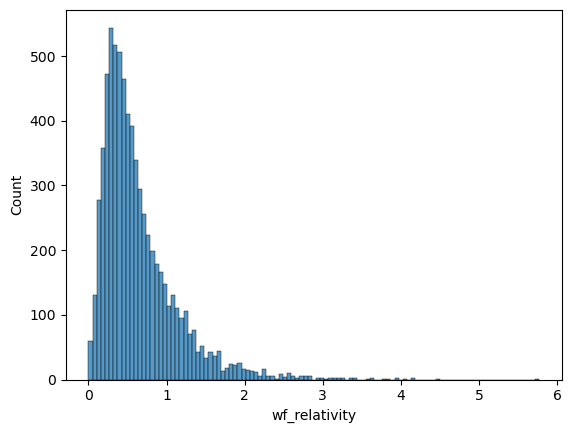

In [143]:
sns.histplot(summaries_test['wf_relativity'])

#### Log transformation

In [144]:
summaries_test['wf_relativity_log'] = np.log(summaries_test['wf_relativity'])

/Users/jadonng/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='wf_relativity_log', ylabel='Count'>

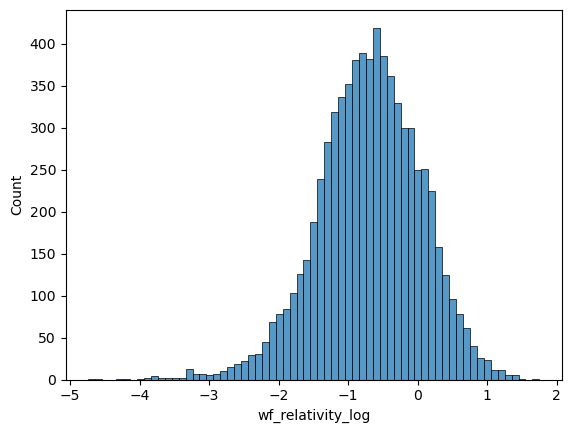

In [147]:
sns.histplot(summaries_test['wf_relativity_log'])

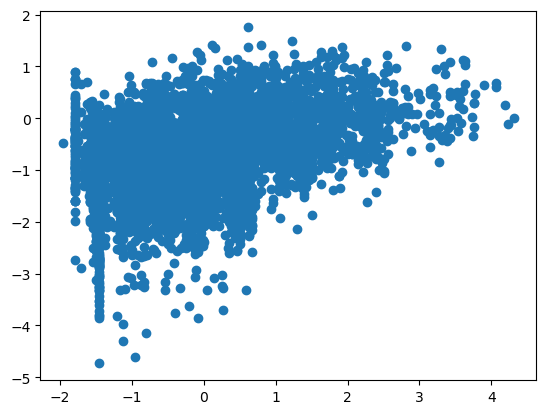

In [145]:
plt.scatter(data=summaries_test, x='wording',y='wf_relativity_log')

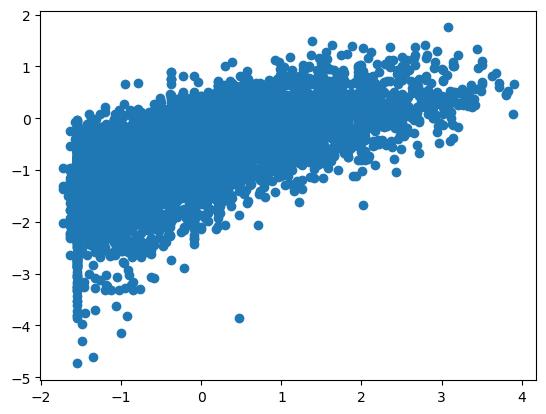

In [146]:
plt.scatter(data=summaries_test, x='content',y='wf_relativity_log')

#### yeojohnson transformation

In [150]:
import scipy.stats as stats
transformed_feature, _ = stats.yeojohnson(summaries_test['wf_relativity'])
summaries_test['wf_relativity_yeojohnson'] = transformed_feature

<AxesSubplot:xlabel='wf_relativity_yeojohnson', ylabel='Count'>

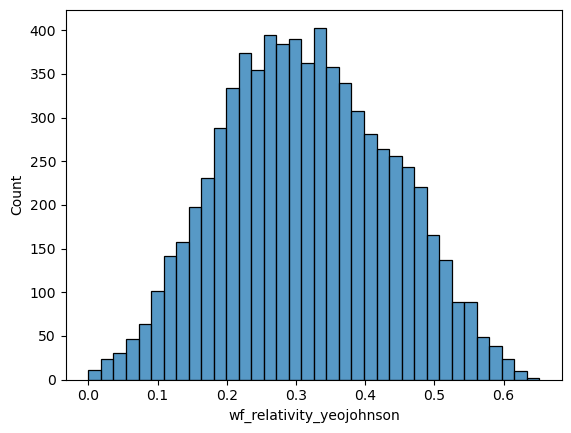

In [153]:
sns.histplot(summaries_test['wf_relativity_yeojohnson'])

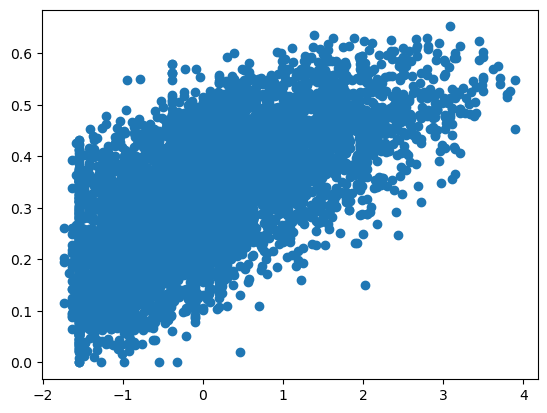

In [154]:
plt.scatter(data=summaries_test, x='content',y='wf_relativity_yeojohnson')

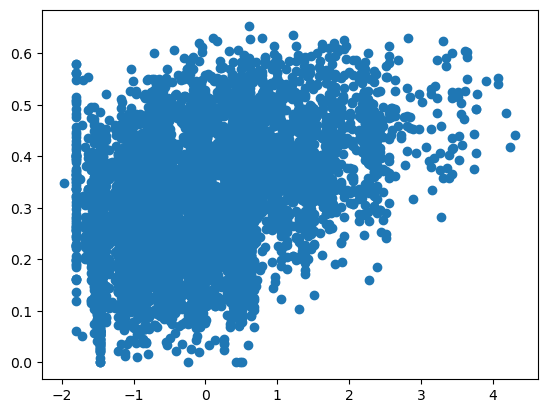

In [155]:
plt.scatter(data=summaries_test, x='wording',y='wf_relativity_yeojohnson')

again, content look alright, wording doesn't seem great 

## Relevance to prompts text (minimal)

In [19]:
prompts.prompt_text

,prompt_id,prompt_question,prompt_title,prompt_text
0,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...
1,3b9047,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...
2,814d6b,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
3,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an..."


In [ ]:
prompts.prompt_text

In [63]:
from collections import Counter

def word_frequency_counter(text):
    words = text.split()
    word_counts = Counter(words)
    return word_counts

In [64]:
def wf_relativity(text, word_list, weight_list):
    total_score = 0
    word_count = word_frequency_counter(remove_stopwords(remove_punct(text)))
    for word, weight in word_count.items():
        if word in word_list:
            total_score += weight * weight_list[word_list.index(word)]/sum(weight_list)
    return total_score

In [65]:
all_env = []

for prompt_id in prompts.prompt_id.unique():
    # get top 50 words and weight from current prompt
    cur_env = summaries[summaries['prompt_id']==prompt_id]
    combined_cleaned_text = remove_stopwords(remove_punct(' '.join(cur_env.text.values)))
    word_frequency_prompt = word_frequency_counter(combined_cleaned_text)
    
    word_list = []
    weight_list = []
    for word, weight in word_frequency_prompt.items():
        word_list.append(word)
        weight_list.append(weight)
    weighted_total = sum(weight_list)
    
    cur_env['wf_prompt'] = cur_env.text.apply(lambda x: wf_relativity(x, word_list, weight_list))
    
    all_env.append(cur_env)
    
summaries = pd.concat(all_env)

/var/folders/fm/rwn89n9x1b94vk3rbr72zvtw0000gn/T/ipykernel_43315/2430680638.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cur_env['wf_prompt'] = cur_env.text.apply(lambda x: wf_relativity(x, word_list, weight_list))


/Users/jadonng/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='wf_prompt', ylabel='content'>

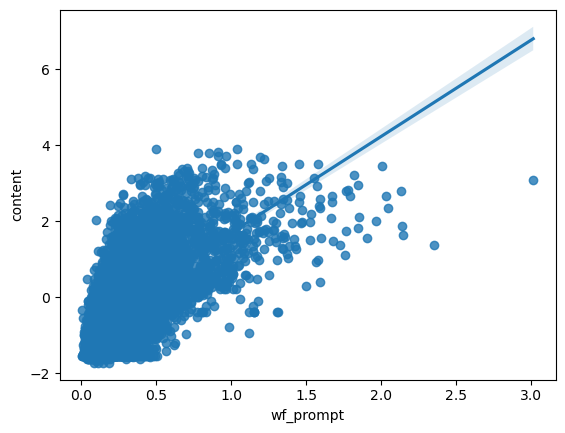

In [29]:
sns.regplot(summaries['wf_prompt'], summaries['content'])

<AxesSubplot:xlabel='wf_prompt', ylabel='wording'>

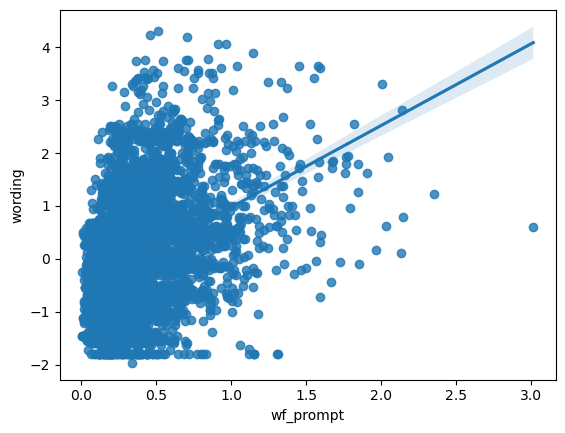

In [30]:
sns.regplot(summaries['wf_prompt'], summaries['wording'])

## Misspelled word

In [66]:
pip install pyspellchecker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 43.0 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [103]:
pip install autocorrect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 21.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622364 sha256=76ba4e6fb088b853ee8600b4a8465cc1ea6a049697b070085cfca534f3e66a11
  Stored in directory: /Users/jadonng/Library/Caches/pip/wheels/ab/0f/23/3c010c3fd877b962146e7765f9e9b08026cac8b035094c5750
Successfully built autocorrect
Note: you may need to restart the kernel to use updated packages.


In [104]:
from spellchecker import SpellChecker
from autocorrect import Speller

spell = SpellChecker()
speller = Speller(lang='en')

In [108]:
def count_misspelled_words(text):
    words = text.split()
    misspelled_count = 0
    misspelled_words = []
    for word in words:
        if not spell.correction(word) == word:
            misspelled_count += 1
            misspelled_words.append(word)
            
    return misspelled_count, misspelled_words

def count_misspelled(text):
    wordlist=text.split()
    amount_miss = len(list(spell.unknown(wordlist)))
    return amount_miss

In [115]:
summaries['misspelled_words'] = summaries.text.apply(lambda x: count_misspelled(remove_punct(x)))

<AxesSubplot:xlabel='misspelled_words', ylabel='Count'>

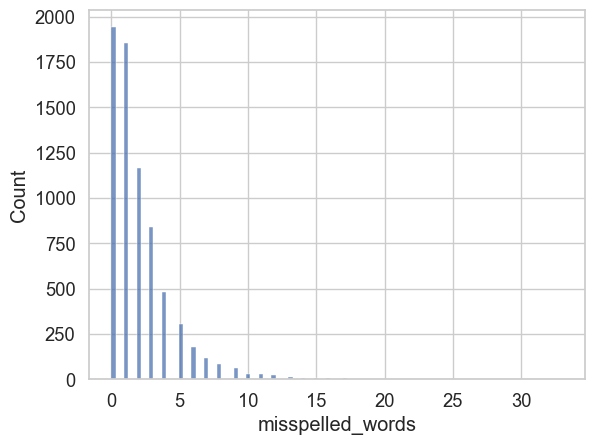

In [116]:
sns.histplot(summaries['misspelled_words'])

/Users/jadonng/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='misspelled_words', ylabel='wording'>

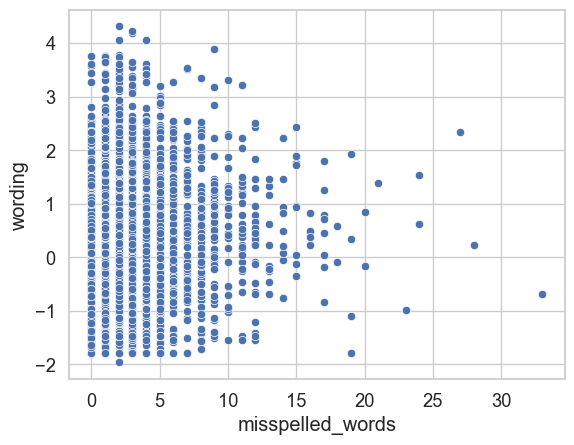

In [117]:
sns.scatterplot(summaries['misspelled_words'],summaries['wording'])

## NOGAWANOGAWA Feature Enginnering Output Analysis

In [31]:
train_kaggle1 = pd.read_csv('NOGAWANOGAWA_train.csv')
train_kaggle1.head()

,Unnamed: 0,student_id,prompt_id,text,content,wording,summary_length,fixed_summary_text,splling_err_num,prompt_question,prompt_title,prompt_text,prompt_length,length_ratio,word_overlap_count,bigram_overlap_count,bigram_overlap_ratio,trigram_overlap_count,trigram_overlap_ratio,quotes_count
0,0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,64,The third wave was an experimental see how peo...,5,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,660,0.096970,14,4,0.063492,0,0.000000,0
1,1,0020ae56ffbf,ebad26,They would rub it up with soda to make the sme...,-0.548304,0.506755,54,They would rub it up with soda to make the sme...,2,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an...",1076,0.050186,18,22,0.415094,10,0.192308,0
2,2,004e978e639e,3b9047,"In Egypt, there were many occupations and soci...",3.128928,4.231226,269,"In Egypt, there were many occupations and soci...",32,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...,625,0.430400,22,52,0.194030,23,0.086142,2
3,3,005ab0199905,3b9047,The highest class was Pharaohs these people we...,-0.210614,-0.471415,28,The highest class was Pharaohs these people we...,5,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...,625,0.044800,6,6,0.222222,5,0.192308,0
4,4,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,232,The Third Wave developed rapidly because the ...,29,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...,660,0.351515,23,27,0.116883,5,0.021739,4


In [37]:
columns = ['splling_err_num', 'prompt_length', 'length_ratio', 'word_overlap_count', 'bigram_overlap_count', 'bigram_overlap_ratio','trigram_overlap_count', 'trigram_overlap_ratio', 'quotes_count']
target_cols = ['content', 'wording']

train_x = train_kaggle1[columns]
train_y = train_kaggle1[target_cols]
train_x.head(1)

,splling_err_num,prompt_length,length_ratio,word_overlap_count,bigram_overlap_count,bigram_overlap_ratio,trigram_overlap_count,trigram_overlap_ratio,quotes_count
0,5,660,0.09697,14,4,0.063492,0,0.0,0


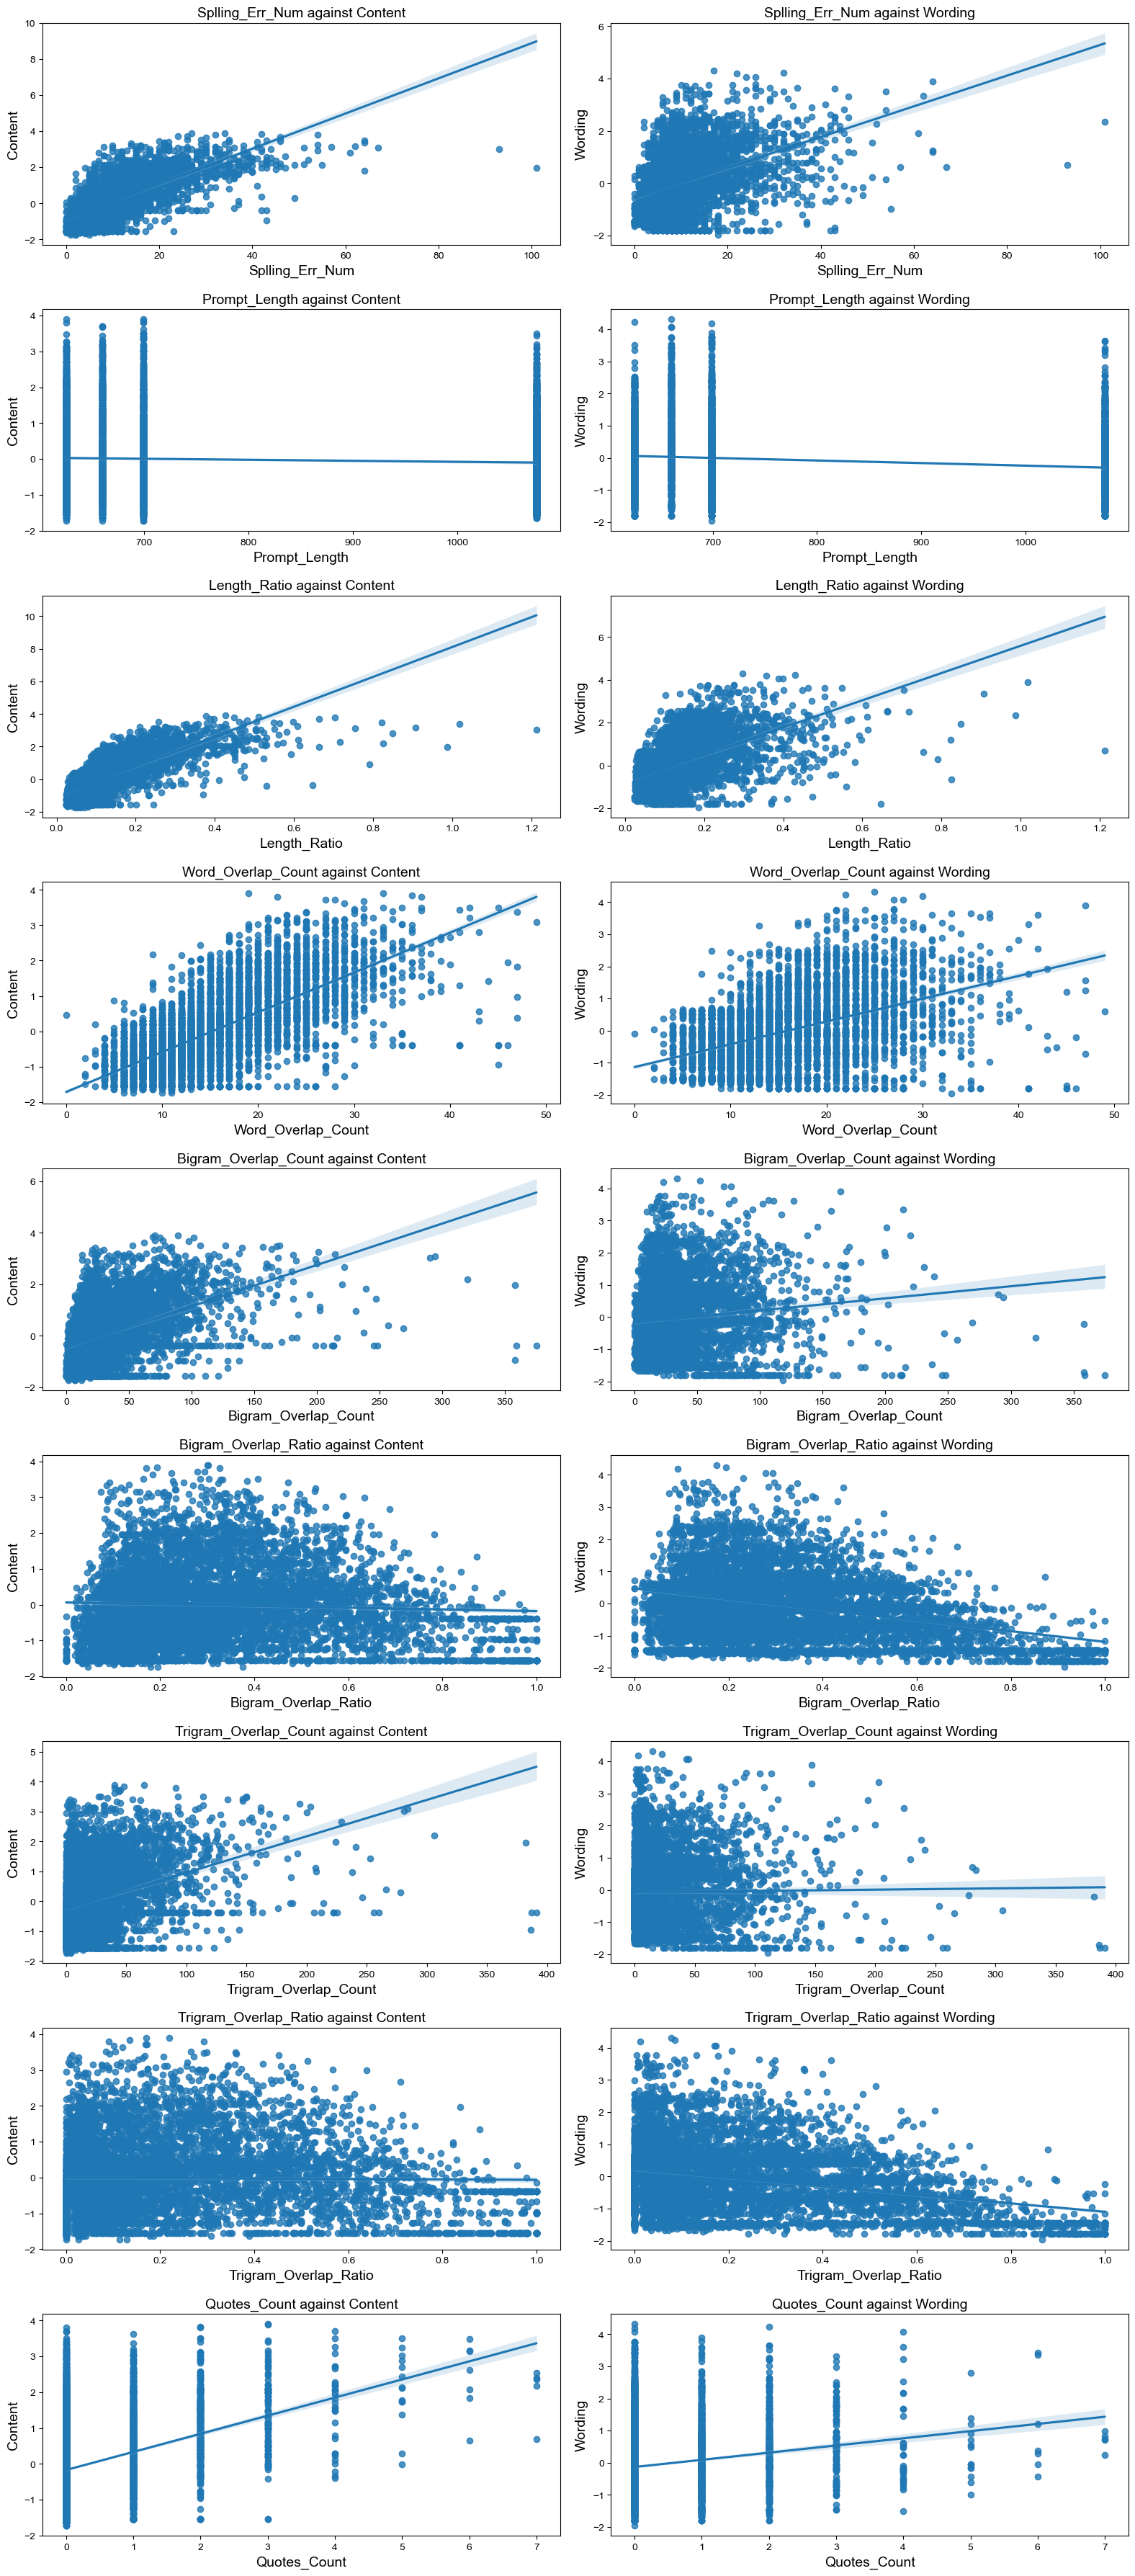

In [40]:
def plot_distribution(df, target):
    num_rows = len(df.columns)
    num_cols = len(target.columns)
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, 4*num_rows))

    for i, col_name in enumerate(df.columns):
        for j, target_name in enumerate(target.columns):
            ax = axes[i, j]
            sns.regplot(x=df[col_name], y=target[target_name], ax=ax)

            ax.set_title(f'{col_name.title()} against {target_name.title()}', fontsize=14)
            ax.set_xlabel(col_name.title(), fontsize=14)
            ax.set_ylabel(target_name.title(), fontsize=14)

    plt.tight_layout()
    plt.show()
    
plot_distribution(train_x, train_y)

/Users/jadonng/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='splling_err_num', ylabel='length_ratio'>

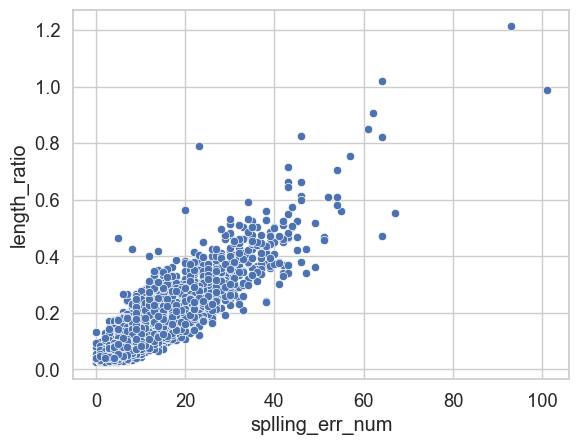

In [41]:
# Just as i expected, spelling error number has high correlation with length ratio

sns.scatterplot(train_kaggle1['splling_err_num'], train_kaggle1['length_ratio'])

/Users/jadonng/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='word_overlap_count', ylabel='length_ratio'>

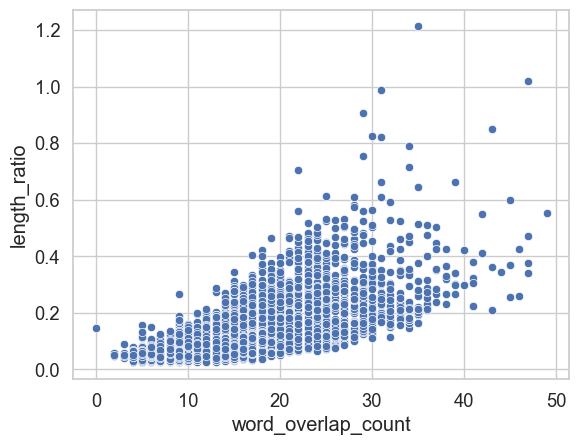

In [45]:
# High correlation yet again

sns.scatterplot(train_kaggle1['word_overlap_count'], train_kaggle1['length_ratio'])

## Small conclusion up to this point

It seems that many of our features created/referenced so far are all surrounding the text length feature, in future sections we should try to think outside of the box and find some alternative solutions.

# Other ideas

1. Number of conjunction words

2. A good summary should be comprehensive and concise, split the prompt text in half and determine the n-gram occurence for both half to determine if the summary have a comprehensive cover of the prompt text

3. 

In [10]:
import pandas as pd

st = pd.read_csv('fixedsummarytext.csv')
tp = pd.read_csv('train_preprocessed.csv')

In [17]:
st.head(1)

,Unnamed: 0,prompt_id,prompt_question,prompt_title,prompt_text,student_id,text,content,wording,fixed_summary_text
0,0,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...,00791789cc1f,1 element of an ideal tragedy is that it shoul...,-0.210614,-0.471415,1 element of an ideal tragedy is that it shoul...


In [14]:
tp['fixed_summary_text'] = st['fixed_summary_text']

In [18]:
tp['prompt_question'] = st['prompt_question']

In [19]:
tp['prompt_text'] = st['prompt_text']

In [20]:
tp['prompt_title'] = st['prompt_title']

In [21]:
tp['prompt_id'] = st['prompt_id']

In [22]:
tp['student_id'] = st['student_id']

In [26]:
tp['text'] = st['text']

In [27]:
tp.head(1)

,content,wording,summary_text_count,summary_prompt_length_ratio,unigram_overlap,bigram_overlap,trigram_overlap,spelling_error,quote_count,vocab_uniqueness,...,WP,RBR,:,fixed_summary_text,prompt_question,prompt_text,prompt_title,prompt_id,student_id,text
0,-0.210614,-0.471415,59,0.084406,0.111913,0.030086,0.005739,4,0,0.76,...,0.0,0.0,0.0,1 element of an ideal tragedy is that it shoul...,Summarize at least 3 elements of an ideal trag...,Chapter 13 \r\nAs the sequel to what has alrea...,On Tragedy,39c16e,00791789cc1f,1 element of an ideal tragedy is that it shoul...


In [24]:
tp.drop('Unnamed: 0',axis=1,inplace=True)

In [28]:
tp.head(1)

,content,wording,summary_text_count,summary_prompt_length_ratio,unigram_overlap,bigram_overlap,trigram_overlap,spelling_error,quote_count,vocab_uniqueness,...,WP,RBR,:,fixed_summary_text,prompt_question,prompt_text,prompt_title,prompt_id,student_id,text
0,-0.210614,-0.471415,59,0.084406,0.111913,0.030086,0.005739,4,0,0.76,...,0.0,0.0,0.0,1 element of an ideal tragedy is that it shoul...,Summarize at least 3 elements of an ideal trag...,Chapter 13 \r\nAs the sequel to what has alrea...,On Tragedy,39c16e,00791789cc1f,1 element of an ideal tragedy is that it shoul...


In [29]:
tp.to_csv('preprocessed_train.csv')